In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
df = pd.read_csv("../data/merged_games_df.csv")
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Console,Game Title,Price,Mean,Median
0,ADVENTURES OF TRON,2600,1981,Action,Mattel Interactive,630000.0,30000.0,NaN,10000.0,670000,2600,ADVENTURES OF TRON,16.10,False,False
1,AIRLOCK,2600,1981,Action,Data Age,360000.0,20000.0,NaN,NaN,390000,2600,AIRLOCK,17.00,False,False
2,ALIEN,2600,1981,Action,20th Century Fox Video Games,740000.0,40000.0,NaN,10000.0,790000,2600,ALIEN,61.24,True,True
3,ARMOR AMBUSH,2600,1981,Action,Mattel Interactive,150000.0,10000.0,NaN,NaN,170000,2600,ARMOR AMBUSH,9.92,False,False
4,ASTEROIDS,2600,1980,Shooter,Atari,4000000.0,260000.0,NaN,50000.0,4310000,2600,ASTEROIDS,14.06,False,False


In [3]:
# drop unnecessary columns
df = df.drop(columns=['Name', 'Platform'])

In [4]:
# dealwith nans
df = df.fillna(0)


In [5]:
# round munrical data
data = df.round(2)

In [6]:
data.shape


(1283, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1283 entries, 0 to 1282
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          1283 non-null   int64  
 1   Genre         1283 non-null   object 
 2   Publisher     1283 non-null   object 
 3   NA_Sales      1283 non-null   float64
 4   EU_Sales      1283 non-null   float64
 5   JP_Sales      1283 non-null   float64
 6   Other_Sales   1283 non-null   float64
 7   Global_Sales  1283 non-null   int64  
 8   Console       1283 non-null   object 
 9   Game Title    1283 non-null   object 
 10  Price         1283 non-null   float64
 11  Mean          1283 non-null   bool   
 12  Median        1283 non-null   bool   
dtypes: bool(2), float64(5), int64(2), object(4)
memory usage: 112.9+ KB


In [8]:
data.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Price
count,1283.000000,1.283000e+03,1.283000e+03,1.283000e+03,1.283000e+03,1.283000e+03,1283.000000
mean,1996.144973,4.949883e+05,1.972486e+05,1.450195e+05,3.302416e+04,8.705144e+05,31.979018
std,4.840275,1.333183e+06,3.937541e+05,4.419527e+05,7.684834e+04,1.930835e+06,29.505511
min,1980.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+04,1.410000
25%,1996.000000,6.000000e+04,2.000000e+04,0.000000e+00,0.000000e+00,1.300000e+05,10.020000
50%,1998.000000,1.800000e+05,7.000000e+04,0.000000e+00,1.000000e+04,3.400000e+05,20.610000
75%,1999.000000,4.800000e+05,1.900000e+05,5.500000e+04,4.000000e+04,9.200000e+05,45.220000
max,2003.000000,2.908000e+07,3.870000e+06,6.810000e+06,1.510000e+06,4.024000e+07,139.500000


In [9]:
# most popular genre
data['Genre'].value_counts()

Sports          246
Action          200
Racing          183
Shooter         132
Fighting        124
Platform        107
Role-Playing     62
Puzzle           51
Simulation       49
Misc             49
Strategy         42
Adventure        38
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

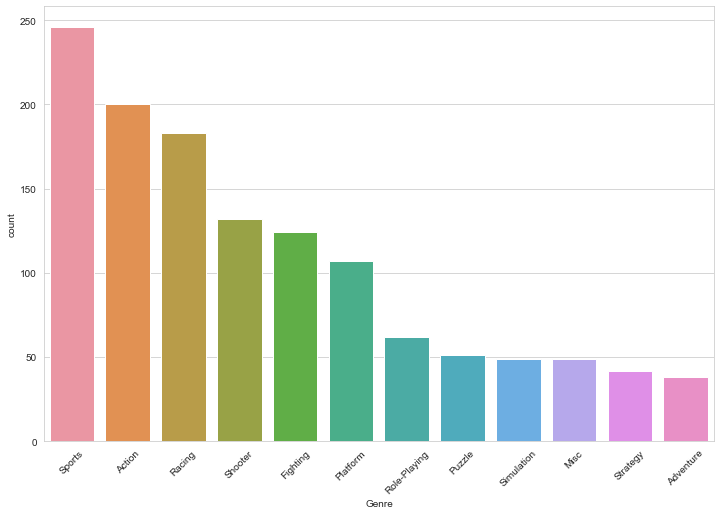

In [10]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Genre', data=data, order = data['Genre'].value_counts().index)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

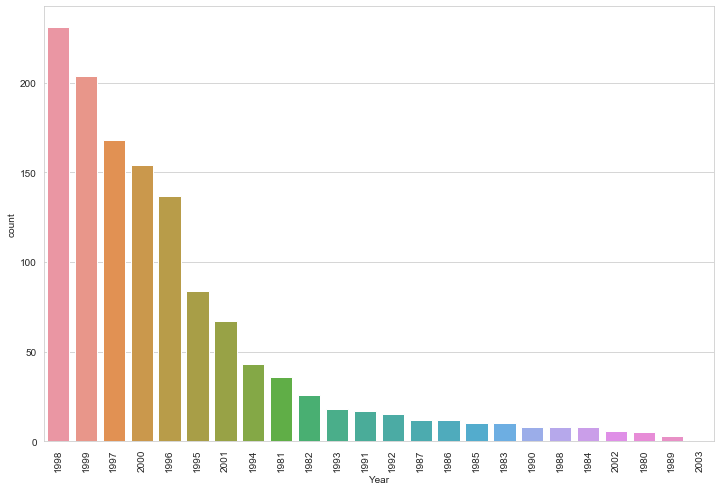

In [11]:
# most games releases in one yoear
plt.figure(figsize=(12, 8))
sns.countplot(x='Year', data=data, order = data.groupby(by=['Year'])['Game Title'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

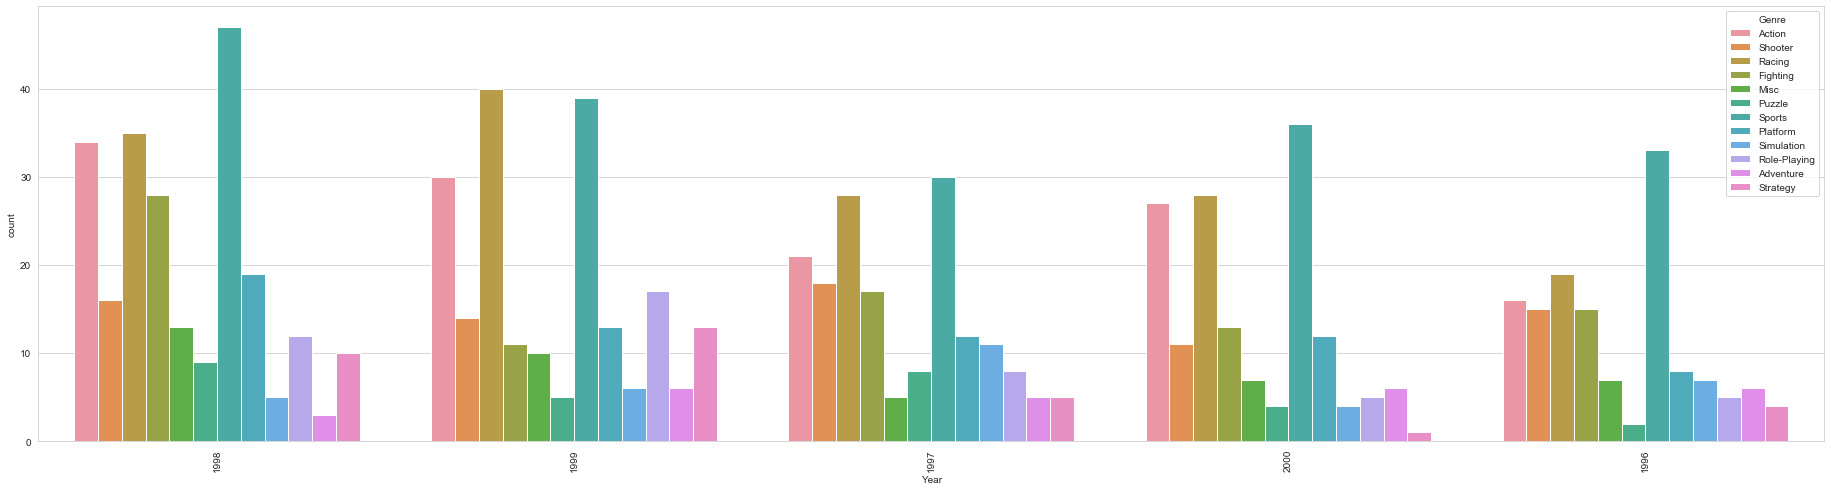

In [12]:
# Top 5 years by Genre
plt.figure(figsize=(32, 8))
sns.countplot(x="Year", data=data, hue = 'Genre', order = data.Year.value_counts().iloc[:5].index)
plt.xticks(rotation=90)

In [13]:
# year with highest sales
year_data = data.groupby(by=['Year'])['Global_Sales'].sum()
year_data  = year_data.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

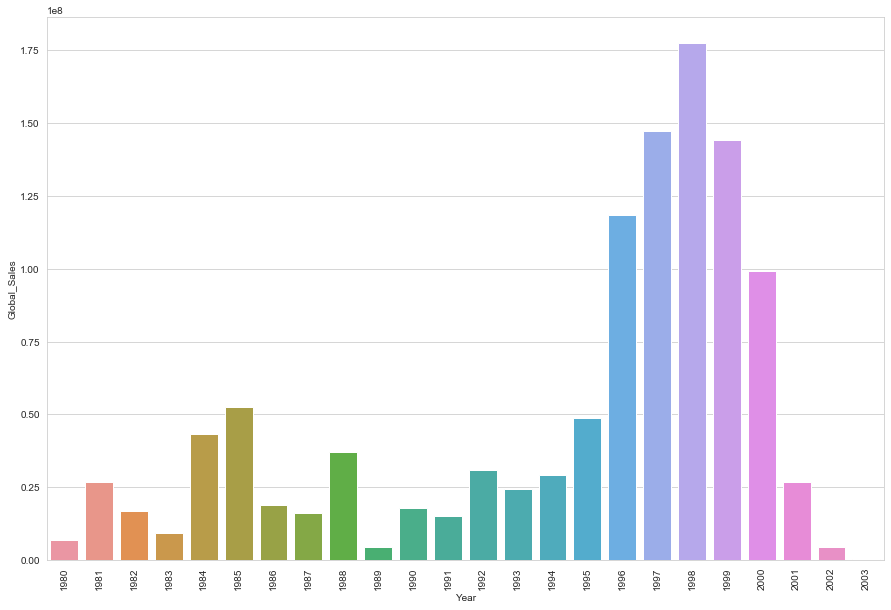

In [14]:
plt.figure(figsize=(15,10))
sns.barplot(x='Year', y='Global_Sales', data=year_data)
plt.xticks(rotation=90)

In [15]:
#find number of different values
data['Price'].value_counts()

17.00     3
11.09     3
5.55      3
16.86     3
25.70     3
         ..
107.75    1
65.25     1
5.79      1
45.67     1
14.97     1
Name: Price, Length: 1151, dtype: int64

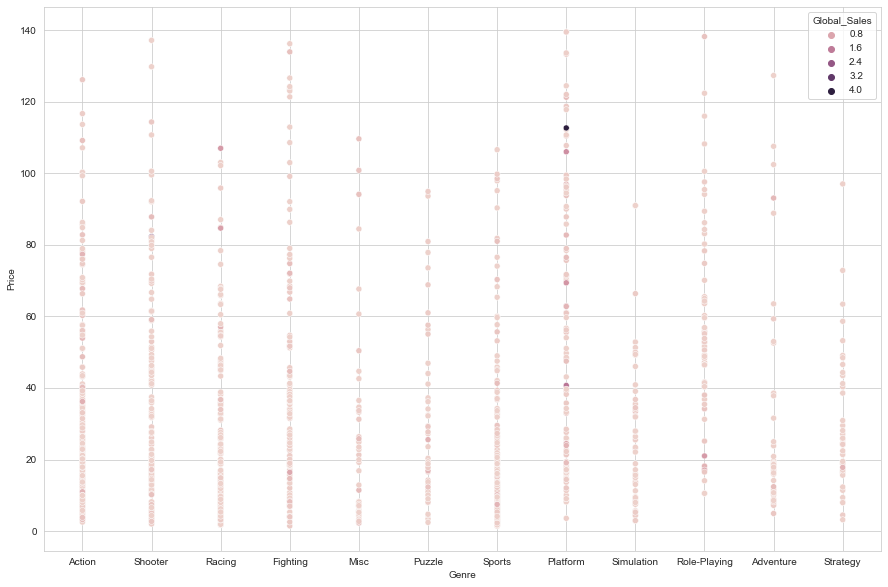

In [16]:
#plot scatter
plt.figure(figsize=(15,10))
sns.scatterplot(x='Genre', y ='Price',  hue ='Global_Sales', data=data)
# plt.xticks(rotation=90)

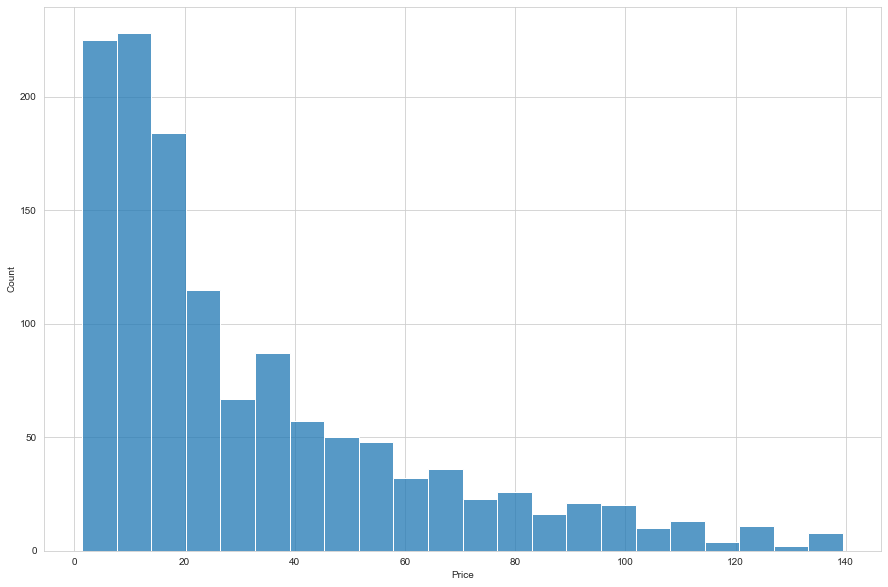

In [17]:
#check distribution of price
plt.figure(figsize=(15,10))
sns.histplot(data['Price'])

# sns.histplot(x = 'Price', hue ='Genre', data=data')
# sns.scatterplot(x='Genre', y ='Price',  hue ='Global_Sales', data=data)

In [15]:
data.head(15)

,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Console,Game Title,Price,Mean,Median
0,1981,Action,Mattel Interactive,630000.0,30000.0,0.0,10000.0,670000,2600,ADVENTURES OF TRON,16.10,False,False
1,1981,Action,Data Age,360000.0,20000.0,0.0,0.0,390000,2600,AIRLOCK,17.00,False,False
2,1981,Action,20th Century Fox Video Games,740000.0,40000.0,0.0,10000.0,790000,2600,ALIEN,61.24,True,True
3,1981,Action,Mattel Interactive,150000.0,10000.0,0.0,0.0,170000,2600,ARMOR AMBUSH,9.92,False,False
4,1980,Shooter,Atari,4000000.0,260000.0,0.0,50000.0,4310000,2600,ASTEROIDS,14.06,False,False
5,1981,Action,Mattel Interactive,290000.0,20000.0,0.0,0.0,310000,2600,ASTROBLAST,12.55,False,False
6,1982,Action,20th Century Fox Video Games,320000.0,20000.0,0.0,0.0,340000,2600,BANK HEIST,40.41,True,True
7,1981,Action,Activision,400000.0,20000.0,0.0,0.0,430000,2600,BARNSTORMING,22.48,False,False
8,1982,Shooter,Atari,580000.0,30000.0,0.0,10000.0,620000,2600,BATTLEZONE,16.42,False,False
9,1984,Racing,Activision,260000.0,10000.0,0.0,0.0,270000,2600,BEAMRIDER,103.04,True,True


In [16]:
# Importing encoded data created by Michelle for modeling
encoded_data = pd.read_csv("../data/encoded_data.csv")
encoded_data.head(10)

,Name,Platform LabelCode,Year,Genre LabelCode,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8,Genre_9,Genre_10,Genre_11
0,ADVENTURES OF TRON,0,1981,0,Mattel Interactive,630000,30000,0,10000,670000,...,0,0,0,0,0,0,0,0,0,0
1,AIRLOCK,0,1981,0,Data Age,360000,20000,0,0,390000,...,0,0,0,0,0,0,0,0,0,0
2,ALIEN,0,1981,0,20th Century Fox Video Games,740000,40000,0,10000,790000,...,0,0,0,0,0,0,0,0,0,0
3,ARMOR AMBUSH,0,1981,0,Mattel Interactive,150000,10000,0,0,170000,...,0,0,0,0,0,0,0,0,0,0
4,ASTEROIDS,0,1980,8,Atari,4000000,260000,0,50000,4310000,...,0,0,0,0,0,0,1,0,0,0
5,ASTROBLAST,0,1981,0,Mattel Interactive,290000,20000,0,0,310000,...,0,0,0,0,0,0,0,0,0,0
6,BANK HEIST,0,1982,0,20th Century Fox Video Games,320000,20000,0,0,340000,...,0,0,0,0,0,0,0,0,0,0
7,BARNSTORMING,0,1981,0,Activision,400000,20000,0,0,430000,...,0,0,0,0,0,0,0,0,0,0
8,BATTLEZONE,0,1982,8,Atari,580000,30000,0,10000,620000,...,0,0,0,0,0,0,1,0,0,0
9,BEAMRIDER,0,1984,6,Activision,260000,10000,0,0,270000,...,0,0,0,0,1,0,0,0,0,0


In [19]:
#drop columns that are not needed
encoded = encoded_data.drop(columns =['Genre LabelCode','Platform LabelCode','Name', 'Publisher', 'Console', 'Game Title', 'Mean', 'Median'])

In [23]:

encoded_df = encoded.rename(columns = {'Platform_0': '2600', 'Platform_1': 'Gen', 'Platform_2':'N64', 'Platform_3':'NES', 'Platform_4':'PS', 'Platform_5':'SAT', 'Platform_6':'SCD', 'Platform_7':'SNES',
                                       'Genre_0':'Action','Genre_1':'Adventure', 'Genre_2':'Fighting', 'Genre_3':'Misc', 'Genre_4':'Platform', 'Genre_5':'Puzzle', 'Genre_6':'Racing', 'Genre_7':'Role-Playing', 
                                       'Genre_8':'Shooter', 'Genre_9':'Simulation', 'Genre_10':'Sports', 'Genre_11':'Strategy'}, inplace = False)
encoded_df

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Price,2600,Gen,N64,...,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1981,630000,30000,0,10000,670000,16,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1981,360000,20000,0,0,390000,17,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1981,740000,40000,0,10000,790000,61,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1981,150000,10000,0,0,170000,9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1980,4000000,260000,0,50000,4310000,14,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,1993,520000,160000,1290000,30000,2000000,67,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1279,1992,0,0,60000,0,60000,108,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1280,1995,0,0,150000,0,150000,36,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1281,1991,0,0,120000,0,120000,84,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [24]:
#create price bins to improve model 
bin_ranges = [0, 10, 20, 40, 80, 140]
bin_names = [1, 2, 3, 4, 5]
encoded_df['Price_bin_custom_range'] = pd.cut(
                                           np.array(
                                              encoded_df['Price']), 
                                              bins=bin_ranges)
encoded_df['Price_bin_custom_label'] = pd.cut(
                                           np.array(
                                              encoded_df['Price']), 
                                              bins=bin_ranges,            
                                              labels=bin_names)
# view the binned features 
encoded_df[['Price', 
               'Price_bin_custom_range',   
               'Price_bin_custom_label']].iloc[1071:1076]

,Price,Price_bin_custom_range,Price_bin_custom_label
1071,3,"(0, 10]",1
1072,7,"(0, 10]",1
1073,8,"(0, 10]",1
1074,4,"(0, 10]",1
1075,12,"(10, 20]",2


In [26]:
# encoded_df.to_csv("../data/encoded_binned_5.csv", index=False)
encoded_df.head(1)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Price,2600,Gen,N64,...,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Price_bin_custom_range,Price_bin_custom_label
0,1981,630000,30000,0,10000,670000,16,1,0,0,...,0,0,0,0,0,0,0,0,"(10, 20]",2


In [27]:
target = encoded_df['Price_bin_custom_label'] 
target_names = ['1', '2', '3', '4', '5']

In [28]:
features = encoded_df.drop(columns= ['Price', 'Price_bin_custom_range', 'Price_bin_custom_label'])
feature_names = features.columns
# features.head(1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target, test_size=0.30, random_state=42)                                                  

In [30]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc = rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.4753246753246753

In [31]:
sorted(zip(rfc.feature_importances_, feature_names), reverse=True)


[(0.16165483794968552, 'Global_Sales'),
 (0.1366546256376534, 'NA_Sales'),
 (0.1327188363440773, 'Year'),
 (0.1143967222481697, 'EU_Sales'),
 (0.08342849440471321, 'JP_Sales'),
 (0.053758223810011885, 'Other_Sales'),
 (0.05235453388322224, 'PS'),
 (0.040268688676256, 'Sports'),
 (0.025203572148974885, 'Action'),
 (0.021488723665068248, 'Racing'),
 (0.020848660695125767, 'Role-Playing'),
 (0.020559966973551322, 'N64'),
 (0.01985416563038381, 'Shooter'),
 (0.01974856217777239, 'Platform'),
 (0.019730710236549116, 'Fighting'),
 (0.013800624460854323, 'Simulation'),
 (0.011391301473135232, 'Puzzle'),
 (0.010747358320446149, 'Strategy'),
 (0.010503802083257057, 'Adventure'),
 (0.009414924926575979, 'Misc'),
 (0.006167327949566147, '2600'),
 (0.004984535731398403, 'SNES'),
 (0.003717940855604538, 'NES'),
 (0.0033200091555770236, 'SAT'),
 (0.003282850562370262, 'Gen'),
 (0.0, 'SCD')]

In [32]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), features.columns), 
             reverse=True))

Features sorted by their score:
[(0.1617, 'Global_Sales'), (0.1367, 'NA_Sales'), (0.1327, 'Year'), (0.1144, 'EU_Sales'), (0.0834, 'JP_Sales'), (0.0538, 'Other_Sales'), (0.0524, 'PS'), (0.0403, 'Sports'), (0.0252, 'Action'), (0.0215, 'Racing'), (0.0208, 'Role-Playing'), (0.0206, 'N64'), (0.0199, 'Shooter'), (0.0197, 'Platform'), (0.0197, 'Fighting'), (0.0138, 'Simulation'), (0.0114, 'Puzzle'), (0.0107, 'Strategy'), (0.0105, 'Adventure'), (0.0094, 'Misc'), (0.0062, '2600'), (0.005, 'SNES'), (0.0037, 'NES'), (0.0033, 'SAT'), (0.0033, 'Gen'), (0.0, 'SCD')]


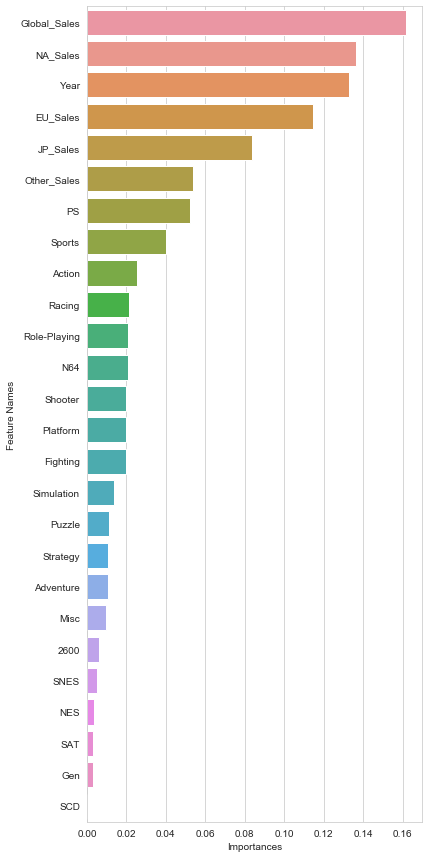

In [33]:
feature_importances = pd.DataFrame({"Feature Names": features.columns, "Importances": rfc.feature_importances_}).sort_values(by="Importances", ascending=False)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="Importances", y="Feature Names", data=feature_importances,
            label="Total")

In [34]:
features_df = feature_importances

In [37]:
conf_mat = (confusion_matrix(y_test, predictions))

In [38]:
predictions = rfc.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[79 25  5  4  0]
 [27 29 15 14  1]
 [ 9 18 32 17  1]
 [ 2 10 21 32  3]
 [ 1  5  7 17 11]]


              precision    recall  f1-score   support

           1       0.67      0.70      0.68       113
           2       0.33      0.34      0.34        86
           3       0.40      0.42      0.41        77
           4       0.38      0.47      0.42        68
           5       0.69      0.27      0.39        41

    accuracy                           0.48       385
   macro avg       0.49      0.44      0.45       385
weighted avg       0.49      0.48      0.47       385



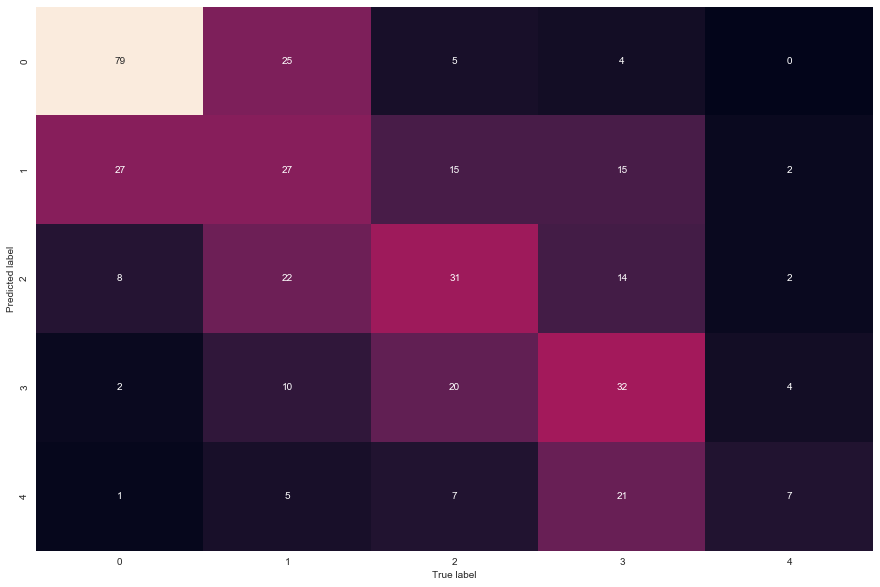

In [35]:
# Plot a confusion matrix using Seaborn's heatmap().
def plot_conf_mat(conf_mat):
    fig, ax = plt.subplots(figsize=(15,10))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes with conf_mat info
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label");

plot_conf_mat(conf_mat)